<b><font size="6">Machine Learning</font><a class="anchor"><a id='toc'></a></b><br>

# <font color='54C13C'>2nd Individual Assignment</font> <a class="anchor" id="first-bullet"></a>

<div class="alert alert-block alert-info">  
    
### Student Name:
Sofia Alexandra Grifo Cunha
### Student Number:
M20190795 
</div>

## <font color="54C13C"> Company Dataset </font> <a>

###  Data Description


 `Employee_ID`: The unique identifier of the employee\
 `Gender`: The gender of the employee\
 `Age`: The age (in years) of the employee\
 `Days_off`:  Number of days the employee took off over the last year\
 `Rotations`: Number of team changes the employee made\
 `Satis_leader`: Level of satisfaction with the leadership\
 `Satis_team`: Level of satisfaction with the team\
 `Emails`: Average number of received emails in a day\
 `Tenure`: Number years the employee has been working for the company\
 `Bonus`: Bonus received as percentage of salary\
 `Distance`: Distance from home to the workplace\
`Kids`: Number of kids\
 `Overtime`: Average number of overtime hours a month\
 `Marital_status`: Marital status of the employee\
 `Department`: Department of the employee\
 `Churn_risk`: Churn risk level of the employee\

### <font color="54C13C"> Imports </font> <a>

In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
warnings.filterwarnings('ignore')

I use the dataset train to build my machine learning model. An the test to see how well my model performs on unseen data. Then I create two objects, one named __company__ that contains the dataset __train.csv__, and the other named __testcompany__ which contains the dataset __test.csv__.

In [2]:
company= pd.read_csv ('train.csv')
testcompany= pd.read_csv ('test.csv')

### <font color="54C13C">  Data Understanding </font> <a>

In [3]:
company

,Employee_ID,Gender,Age,Days_off,Rotations,Satis_leader,Satis_team,Emails,Tenure,Bonus,Distance,Kids,Overtime,Marital_status,Department,Churn_risk
0,1000001,female,38.0,6.0,1.0,0.364742,0.832,4.0,1.095890,0.356,3.33,1.0,12.8,married,computer services,medium
1,1000002,female,37.0,8.0,1.0,0.379939,1.280,26.0,13.369863,0.801,3.22,1.0,9.7,married,human resources,low
2,1000003,male,36.0,6.0,1.0,0.303951,1.104,29.0,14.684932,0.382,3.11,1.0,9.8,married,finances,low
3,1000004,male,27.0,5.0,1.0,0.273556,0.624,30.0,11.506849,-0.005,3.48,1.0,12.5,together,computer services,medium
4,1000005,male,30.0,8.0,1.0,0.212766,2.272,5.0,7.561644,0.260,3.14,1.0,10.1,together,sales,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,1005196,male,32.0,6.0,0.0,2.112462,0.752,49.0,17.753425,0.830,3.21,1.0,9.0,together,accounting,medium
5196,1005197,male,27.0,7.0,1.0,0.303951,0.480,38.0,15.561644,-0.108,3.40,0.0,12.9,together,human resources,medium
5197,1005198,male,32.0,6.0,1.0,1.215805,0.720,28.0,13.479452,0.280,3.02,0.0,11.4,together,human resources,medium
5198,1005199,male,28.0,5.0,1.0,1.018237,0.656,61.0,25.205479,0.505,3.12,0.0,8.9,together,sales,low


In [4]:
company.isnull().sum()

Employee_ID       0
Gender            0
Age               9
Days_off          8
Rotations         2
Satis_leader      2
Satis_team        1
Emails            0
Tenure            0
Bonus             0
Distance          9
Kids              4
Overtime          0
Marital_status    0
Department        0
Churn_risk        0
dtype: int64

### <font color="54C13C"> Transformations </font> <a>

**Missing values**: After analysing the missing values that exist in the dataset, I use the method __notna()__ to slove this problem, and to after create the model.

In [5]:
company = company[company['Days_off'].notna()]
company = company[company['Rotations'].notna()]
company = company[company['Satis_leader'].notna()]
company = company[company['Satis_team'].notna()]
company = company[company['Distance'].notna()]
company = company[company['Kids'].notna()]
company = company[company['Days_off'].notna()]

In [6]:
company = company[company['Age'].notna()]

In [7]:
company.isnull().sum()

Employee_ID       0
Gender            0
Age               0
Days_off          0
Rotations         0
Satis_leader      0
Satis_team        0
Emails            0
Tenure            0
Bonus             0
Distance          0
Kids              0
Overtime          0
Marital_status    0
Department        0
Churn_risk        0
dtype: int64

Due to the fact that we cant scalle categorical variables, I decided to replace the categories, so this variable transforms into a numerical one.

In [8]:
company['Churn_risk'] = company['Churn_risk'].replace('low', 0)
company['Churn_risk'] = company['Churn_risk'].replace('medium', 1)
company['Churn_risk'] = company['Churn_risk'].replace('high', 2)

`Gender`, `Department`and `Marital_status`are categorical variables, so in a way to solve this problem for the futher analysis, my solution was to transform into label enconder

In [9]:
le = LabelEncoder()
company['Gender'] = le.fit_transform(company.Gender)
company['Department'] = le.fit_transform(company.Gender)
company['Marital_status'] = le.fit_transform(company.Gender)

In [10]:
company.set_index('Employee_ID', inplace = True)

In [12]:
company['Age'] = company['Age'].astype('int64')

In [13]:
company

,Gender,Age,Days_off,Rotations,Satis_leader,Satis_team,Emails,Tenure,Bonus,Distance,Kids,Overtime,Marital_status,Department,Churn_risk
Employee_ID,,,,,,,,,,,,,,,
1000001,0,38,6.0,1.0,0.364742,0.832,4.0,1.095890,0.356,3.33,1.0,12.8,0,0,1
1000002,0,37,8.0,1.0,0.379939,1.280,26.0,13.369863,0.801,3.22,1.0,9.7,0,0,0
1000003,1,36,6.0,1.0,0.303951,1.104,29.0,14.684932,0.382,3.11,1.0,9.8,1,1,0
1000004,1,27,5.0,1.0,0.273556,0.624,30.0,11.506849,-0.005,3.48,1.0,12.5,1,1,1
1000005,1,30,8.0,1.0,0.212766,2.272,5.0,7.561644,0.260,3.14,1.0,10.1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005196,1,32,6.0,0.0,2.112462,0.752,49.0,17.753425,0.830,3.21,1.0,9.0,1,1,1
1005197,1,27,7.0,1.0,0.303951,0.480,38.0,15.561644,-0.108,3.40,0.0,12.9,1,1,1
1005198,1,32,6.0,1.0,1.215805,0.720,28.0,13.479452,0.280,3.02,0.0,11.4,1,1,1


**Outliers**:

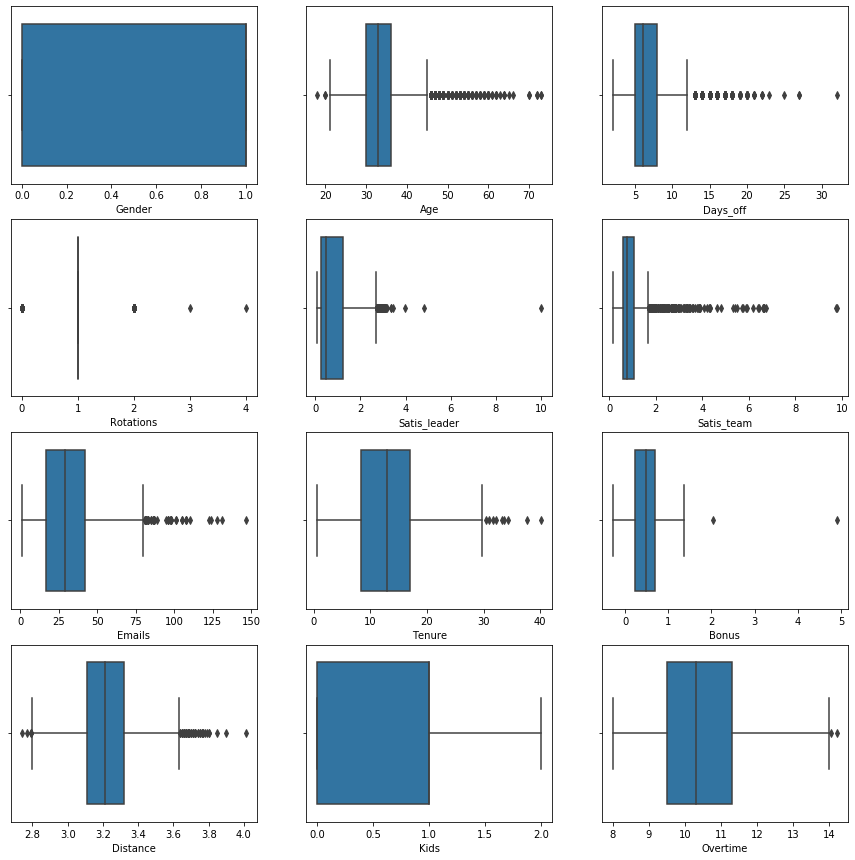

In [14]:
numerical=company.select_dtypes(include=['int32', 'int64', 'float64']).columns
# Do boxplots on all numeric variables
fig, ax = plt.subplots(4, 3, figsize=(15, 15))
for var, subplot in zip(company[numerical], ax.flatten()):
    sns.boxplot(company[var], ax=subplot)
    color= 'green'

In [15]:
company = company[((company['Bonus']>=0))]
company = company[((company['Emails']<120))]

I create an object named __X_company__ that will contain the independent variables and another object named __y_company__ that will contains the independent varaible. And it was used the train_test_slipt method to slipt the data into the train and test sets. The divison was with 75% of the data to build the model, and 25% to evaluate the performance of the final model.

In [16]:
X_company = company.drop('Churn_risk', axis=1)
y_company = company['Churn_risk']

X_train_company, X_test_company, y_train_company, y_test_company =train_test_split(X_company,y_company,
                                                                                   test_size = 0.25, 
                                                                                   random_state = 15,
                                                                                   shuffle = True)

For the scaling of the train data I create an object named __scaler__ that will contain an instance of __StandardScaler()__, and after I fitted the data to the __X_train_company__. The train and test dataset were transform using the scaler.

In [17]:
scaler  = StandardScaler()
scaler.fit(X_train_company)
StandardScaler(copy = True, with_mean = True, with_std = True)

X_train_company = scaler.transform(X_train_company)
X_test_company = scaler.transform(X_test_company)

### <font color="54C13C"> Classifier </font> <a>

I create an instace of  __MKNeighborsClassifier__ named __knn__, where after a research for the best parameters, the ones that provides a better results were:
- __n_neighbors__: 43
- __weights__: distance
- __p__: 1 
- __algorithm__: auto
- __metric_params__: None
- __n_jobs__: 1
- __metric__: minkowski
- All the other parameters were by default 


And after I use the __.fit()__method of model to fit the model to the array of points __X_train_company__ and __y_train_company__.

I use the __.predict()__ method to predict the labels of points in __X_test_company__. To do that I create an object named __predictknn__, which contains the predicted values for the test set.


In [18]:
knn = KNeighborsClassifier(n_neighbors=43, weights='distance', p=1, algorithm='auto'
                           , metric_params=None, n_jobs=1, metric='minkowski')

knn.fit(X_train_company,y_train_company)
predictknn = knn.predict(X_test_company)

To classify the model I use several metrics, namely the precison, recall, f1-score, suport, accuracy, macro average, and weighted average. To check them I use the __F1_Score__ the __Classification Report__.

In [19]:
print(f1_score (y_test_company, predictknn, average='weighted'))

0.760933486213947


In [20]:
print (classification_report (y_test_company, predictknn))

              precision    recall  f1-score   support

           0       0.80      0.61      0.69       497
           1       0.75      0.89      0.81       699
           2       1.00      0.45      0.62        29

    accuracy                           0.77      1225
   macro avg       0.85      0.65      0.71      1225
weighted avg       0.78      0.77      0.76      1225



Final Result: Due to the fact that the evaluation metric for this model in this assignment is the F1_score, I also print it separately, where is visible that the F1_score for this model is 0.7609.

### <font color="54C13C"> Test Set </font> <a>


In [22]:
tc = testcompany.copy()
tc

,Employee_ID,Gender,Age,Days_off,Rotations,Satis_leader,Satis_team,Emails,Tenure,Bonus,Distance,Kids,Overtime,Marital_status,Department
0,1005201,male,30.0,8.0,1.0,1.094225,0.752,41.0,16.547945,0.604,3.11,1,9.2,together,human resources
1,1005202,male,34.0,3.0,1.0,0.699088,1.280,34.0,18.849315,0.380,3.23,0,11.1,together,accounting
2,1005203,male,37.0,5.0,1.0,1.246201,0.608,72.0,22.136986,0.566,3.12,1,10.0,married,human resources
3,1005204,male,34.0,5.0,1.0,1.048632,0.320,14.0,10.191781,0.390,3.00,0,10.7,together,accounting
4,1005205,male,27.0,6.0,1.0,0.721884,0.528,23.0,10.301370,0.100,3.42,0,11.8,together,marketing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,1006496,male,44.0,5.0,1.0,0.182371,0.752,25.0,11.945205,0.210,3.23,0,12.5,married,human resources
1296,1006497,male,32.0,4.0,1.0,0.896657,0.864,40.0,16.657534,0.380,3.20,1,10.8,together,human resources
1297,1006498,male,33.0,5.0,1.0,1.975684,0.816,72.0,19.397260,0.720,3.16,0,9.8,together,sales
1298,1006499,male,29.0,5.0,1.0,1.200608,0.720,54.0,22.794521,0.572,3.17,0,9.1,together,accounting


**Missing values**: After analysing the missing values that exist in the dataset, I replace them by 0 and bt the mean to slove this problem.

In [23]:
tc.loc[tc.Days_off.isnull(), 'Days_off'] = 0 
tc.loc[tc.Rotations.isnull(), 'Rotations'] = 0 
tc.loc[tc.Satis_leader.isnull(), 'Satis_leader'] = 0 
tc.loc[tc.Satis_team.isnull(), 'Satis_team'] = 0 
tc.loc[tc.Distance.isnull(), 'Distance'] = 0 
tc.loc[tc.Kids.isnull(), 'Kids'] = 0 
tc.loc[tc.Age.isnull(), 'Age'] = tc.Age.mean()

In [24]:
tc.isnull().sum()

Employee_ID       0
Gender            0
Age               0
Days_off          0
Rotations         0
Satis_leader      0
Satis_team        0
Emails            0
Tenure            0
Bonus             0
Distance          0
Kids              0
Overtime          0
Marital_status    0
Department        0
dtype: int64

`Gender`, `Department`and `Marital_status`are categorical variables, so in a way to solve this problem for the futher analysis, my solution was to transform into label encoder.

In [25]:
tc['Gender'] = le.fit_transform(tc.Gender)
tc['Department'] = le.fit_transform(tc.Gender)
tc['Marital_status'] = le.fit_transform(tc.Gender)

In [26]:
tc['Age'] = tc['Age'].astype('int64')

For the scaling of the test data I create an object named __scaler__ that will contain an instance of __StandardScaler()__, and after I fitted the data to the __tc__.

In [28]:
scaler = StandardScaler()

norm = scaler.fit(tc)
tc = norm.transform(tc)

### <font color="54C13C"> Test prediction </font> <a>

After having the train results of my model, the next step was to predict it in the test dataset, wich after the transformations is named __tc__. 

In [29]:
model = knn.predict(tc)
predict =pd.DataFrame()
predict['Employee_ID']= testcompany['Employee_ID'].copy()
predict['Churn_risk'] = model
predict

,Employee_ID,Churn_risk
0,1005201,0
1,1005202,1
2,1005203,1
3,1005204,1
4,1005205,1
...,...,...
1295,1006496,1
1296,1006497,1
1297,1006498,1
1298,1006499,0


In [30]:
predict['Churn_risk'] = predict['Churn_risk'].replace(0, 'low')
predict['Churn_risk'] = predict['Churn_risk'].replace(1, 'medium')
predict['Churn_risk'] = predict['Churn_risk'].replace(2, 'high')

In [31]:
predict

,Employee_ID,Churn_risk
0,1005201,low
1,1005202,medium
2,1005203,medium
3,1005204,medium
4,1005205,medium
...,...,...
1295,1006496,medium
1296,1006497,medium
1297,1006498,medium
1298,1006499,low


### <font color="54C13C"> Export .csv file </font> <a>

In [32]:
predict.to_csv('m20190795_version16.csv',index=False, header=True)